In [21]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read archive
df_amz = pd.read_csv("amz_uk_price_prediction_dataset.csv") #The archive its too heavy that it can not be uploaded in github. Please check in kaggle the database

# Visualize first rows
df_amz.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Part 1: Understanding Product Categories

### Business Question
**What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?**

The most popular product category on Amazon Uk is Sports & Outdoors by far, representing 91.61% inside the top 5 categories


---

### 1.Frequency Tables
1. Generate a frequency table for the product category.
2. Identify the **top 5 most listed product categories**.

### 2.Visualizations
1. Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

2. For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [3]:
# Displaying the data types of each column in the dataframe
df_amz.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [4]:
# Retrieving the number of rows and columns in the dataframe
df_amz.shape

(2443651, 9)

In [5]:
# 1.1.Generate a frequency table
frequency_table = df_amz['category'].value_counts()
# Display the frequency table
print("Frequency Table:")
print(frequency_table)

Frequency Table:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [6]:
# 1.2.Dataset for top 5 most frequent categories
top_5_categories = df_amz['category'].value_counts().head(5)

# Print the top 5 categories
print("Top 5 categories:")
print(top_5_categories)

Top 5 categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


C:\Users\celia\AppData\Local\Temp\ipykernel_12604\1088542799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3")


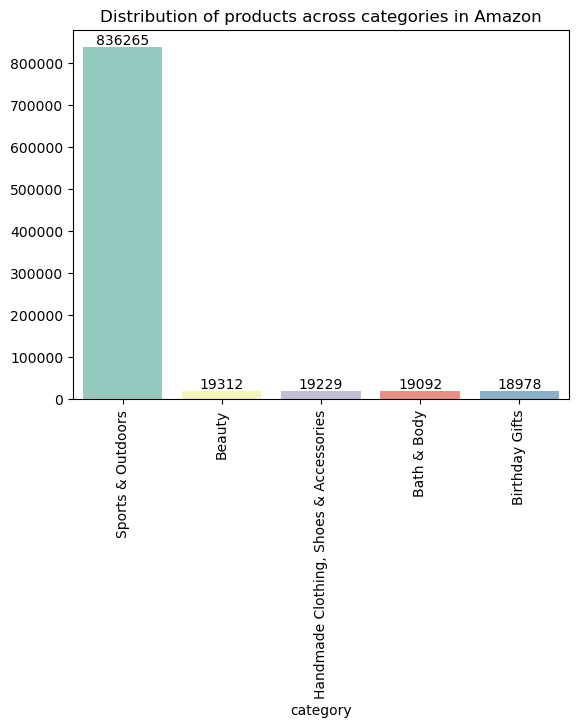

In [7]:
#2.1.Bar chart for 5 top categories, other bar charts imposible to read due to the hig number of products inside first category.
ax = sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3")
# Add numbers in each bar
for container in ax.containers:
    ax.bar_label(container) 
plt.xticks(rotation=90)
plt.title("Distribution of products across categories in Amazon")
plt.show()

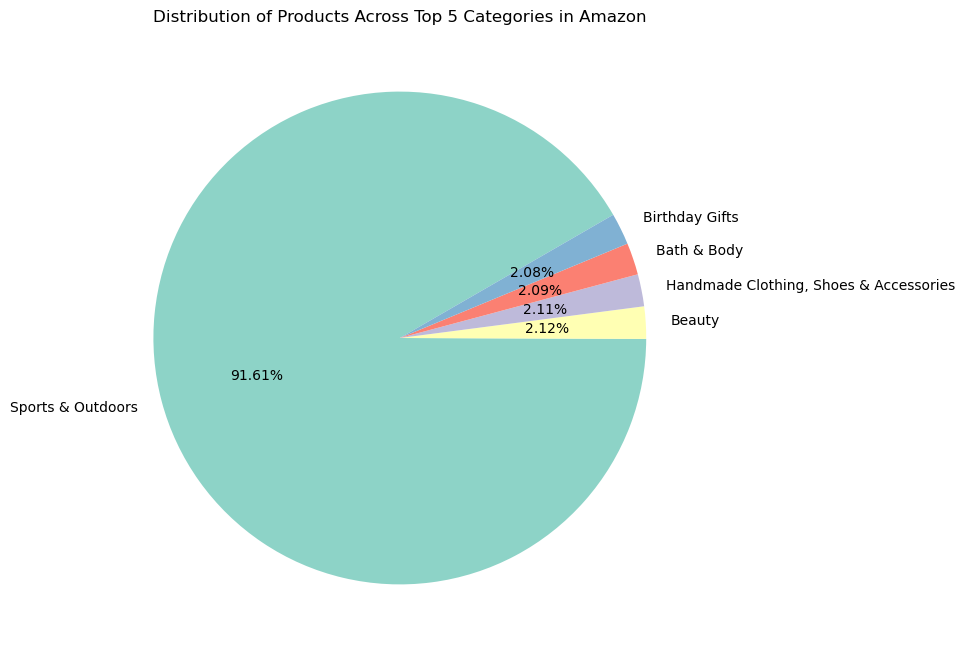

In [8]:
#2.2.Plotting a pie chart of the 'top 5 category' table, with percentage labels
top_5_categories.plot.pie(autopct='%1.2f%%', startangle=30, colors=sns.color_palette("Set3"), figsize=(8, 8))
plt.ylabel('') 
plt.title("Distribution of Products Across Top 5 Categories in Amazon")
plt.show()

In [9]:
#Answer business question part 1
print("The most popular product category on Amazon Uk is Sports & Outdoors by far, representing 91.61% inside the top 5 categories")

The most popular product category on Amazon Uk is Sports & Outdoors by far, representing 91.61% inside the top 5 categories


## Part 2: Delving into Product Pricing

### Business Question
### **How are products priced on Amazon UK, and are there specific price points or ranges that are more common?**
### The most common prices are between 9.99 and 45.99. But there are quite a big number of outliers that affects all the data. When visualising most common prices are between 9-35€
---

### 1.Measures of Centrality:

1. Calculate the mean, median, and mode for the price of products.
2. What's the average price point of products listed? How does this compare with the most common price point (mode)?

### 2.Measures of Dispersion:

1. Determine the variance, standard deviation, range, and interquartile range for product price.
2. How varied are the product prices? Are there any indicators of a significant spread in prices?

### 3.Visualizations:

1. Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
2. Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [51]:
#2.1.1 Measures of Centrality
mean_price = df_amz['price'].mean()
median_price = df_amz['price'].median()
mode_price = df_amz['price'].mode()[0]

# Print results
print("Measures of centrality:")
print(f"The mean for price column is: {mean_price:.2f}")
print(f"The median for price column is: {median_price:.2f}")
print(f"The mode for price column is: {mode_price:.2f}")

Measures of centrality:
The mean for price column is: 89.24
The median for price column is: 19.09
The mode for price column is: 9.99


In [52]:
#2.1.2.Avg price point of products listed. Compare to the most common price point
print("The average price point (89.24) is higher than the most common price point (mode: 9.99). This suggests that the data is skewed towards higher prices.")

The average price point (89.24) is higher than the most common price point (mode: 9.99). This suggests that the data is skewed towards higher prices.


In [53]:
#2.2.1. Measures of Dispersion
variance_price = df_amz['price'].var()
std_dev_price = df_amz['price'].std()
min_price = df_amz['price'].min()
max_price = df_amz['price'].max()
range_price = max_price - min_price
quantiles_price = df_amz['price'].quantile([0.25, 0.5, 0.75])

#Print results
print("Measures of dispersion:")
print(f"The variance for price column is: {variance_price:.2f}")
print(f"The standart desviation for price column is: {std_dev_price:.2f}")
print(f"The max for price column is: {max_price:.2f}")
print(f"The min for price column is: {min_price:.2f}")
print(f"The range for price column is: {range_price:.2f}")
print("The quantiles for price column are:")
for label, value in zip(['Q1', 'Q2 (Median)', 'Q3'], quantiles_price):
    print(f"{label}: {value:.2f}")

Measures of dispersion:
The variance for price column is: 119445.49
The standart desviation for price column is: 345.61
The max for price column is: 100000.00
The min for price column is: 0.00
The range for price column is: 100000.00
The quantiles for price column are:
Q1: 9.99
Q2 (Median): 19.09
Q3: 45.99


In [54]:
#2.2.2.How varied are the product prices? Are there any indicators of a significant spread in prices?
skewness_price = df_amz['price'].skew()
kurtosis_price = df_amz['price'].kurtosis()

print(f"The skewness for the price column is: {skewness_price:.2f}")
print(f"The kurtosis for the price column is: {kurtosis_price:.2f}")


The skewness for the price column is: 27.49
The kurtosis for the price column is: 4241.62


In [55]:
#2.2.2.How varied are the product prices? Are there any indicators of a significant spread in prices?
print("The product prices are extremely varied.\nThe skewness (27) indicates a highly right-skewed distribution, where most prices are concentrated in the lower range, but a few very high prices create a long tail on the right.\nThe kurtosis (4241) confirms the presence of extreme outliers, as the distribution has exceptionally heavy tails.\nThese metrics strongly highlight a significant spread in prices caused by the presence of extremely high-priced products.")

The product prices are extremely varied.
The skewness (27) indicates a highly right-skewed distribution, where most prices are concentrated in the lower range, but a few very high prices create a long tail on the right.
The kurtosis (4241) confirms the presence of extreme outliers, as the distribution has exceptionally heavy tails.
These metrics strongly highlight a significant spread in prices caused by the presence of extremely high-priced products.


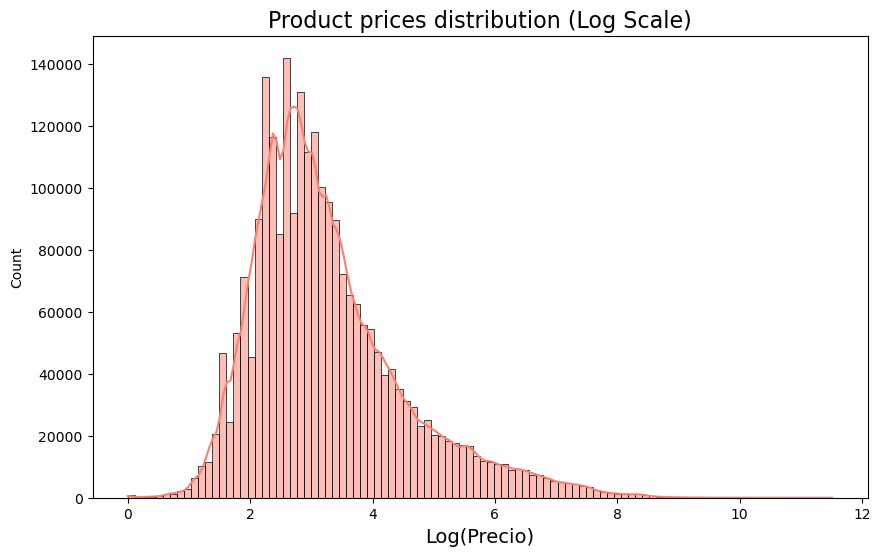

In [56]:
#2.3.1 Distribution of product prices
#Apply logarithm to prices to handle high variability
df_amz['log_price'] = np.log(df_amz['price'] + 1)  # +1 para evitar log(0)

# Visualization for histogram with logaritmic prices represented
plt.figure(figsize=(10, 6))
sns.histplot(df_amz['log_price'], kde=True, bins=100, color="salmon", edgecolor='black')
plt.title('Product prices distribution (Log Scale)', fontsize=16)
plt.xlabel('Log(Precio)', fontsize=14)

plt.show()

<Axes: xlabel='price'>

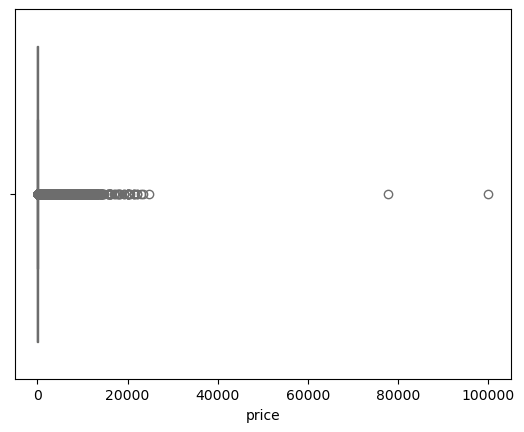

In [57]:
# 2.3.2 Use a box plot to showcase the spread and potential outliers in product pricing
# Plotting a boxplot for the 'SalePrice' column with a light blue color
sns.boxplot(x = df_amz['price'], color="salmon")

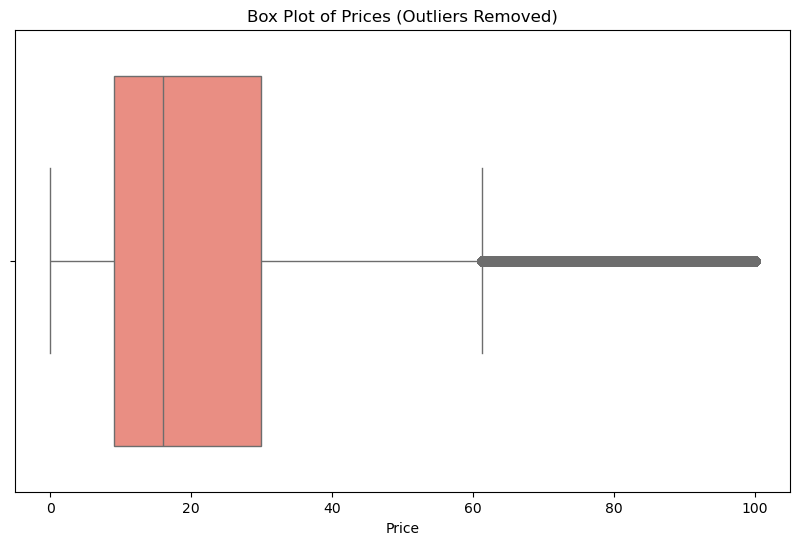

In [58]:
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(df_amz['price'], 25)  # First quartile (25%)
Q3 = np.percentile(df_amz['price'], 75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range

# Calculate boundaries to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_amz_no_outliers_prices = df_amz['price'][(df_amz['price'] >= lower_bound) & (df_amz['price'] <= upper_bound)]

# Plot the box plot with filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_amz_no_outliers_prices, color="salmon")
plt.title("Box Plot of Prices (Outliers Removed)")
plt.xlabel("Price")
plt.show()

## Part 3: Unpacking Product Ratings

### Business Question:
### **How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?**
### Customers tend to calificate in a extreme values or too good or too bad, indicating inconsistency in feedback. This could reflect differences in customer expectations, product quality, or rating behavior
----------------------------------

### 1.Measures of Centrality:
- 1.Calculate the mean, median, and mode for the rating of products.
- 2.Question: How do customers generally rate products? Is there a common trend?

### 2.Measures of Dispersion:
- 1.Determine the variance, standard deviation, and interquartile range (IQR) for product ratings.
- 2.Question: Are the ratings consistent, or is there a wide variation in customer feedback?

### 3.Shape of the Distribution:
- 1.Calculate the skewness and kurtosis for the rating column.
- 2.Question: Are the ratings normally distributed, or do they lean towards higher or lower values?

### 4.Visualizations:
- 1.Plot a histogram to visualize the distribution of product ratings.
- 2.Question: Is there a specific rating that is more common?


In [35]:
#3.1.1 Calculate the measures of centrality for product ratings
mean_rating = df_amz['stars'].mean()
median_rating = df_amz['stars'].median()
mode_rating = df_amz['stars'].mode()[0]

# Print results
print("Measures of centrality:")
print(f"The mean for stars column is: {mean_rating:.2f}")
print(f"The median for stars column is: {median_rating:.2f}")
print(f"The mode for stars column is: {mode_rating:.2f}")

Measures of centrality:
The mean for stars column is: 2.15
The median for stars column is: 0.00
The mode for stars column is: 0.00


In [ ]:
#3.1.2 Create a frequency table to understand customers ratings
# Define bins and labels
bins = [0, 1, 2, 3, 4, 5]
labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]

# Create a new column for binned ratings
df_amz["stars_grouped"] = pd.cut(df_amz["stars"], bins=bins, labels=labels, right=False)

# Create a frequency table for the grouped ratings
grouped_frequency_table = df_amz["stars_grouped"].value_counts().reset_index()
grouped_frequency_table.columns = ["Stars Range", "Count"]

# Sort by the bins
grouped_frequency_table = grouped_frequency_table.sort_values(by="Stars Range")

# Visualise frequency table
grouped_frequency_table

,Stars Range,Count
0,0-1,1225641
4,1-2,10014
3,2-3,18270
2,3-4,158353
1,4-5,902881


In [ ]:
#3.1.2.How Customers generally rate products
print("Generally with 0-1, but we can also see a big number rate products between 4-5")

In [40]:
#3.2.1. Measures of Dispersion
variance_rating = df_amz['stars'].var()
std_dev_rating = df_amz['stars'].std()
min_rating = df_amz['stars'].min()
max_rating = df_amz['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df_amz['stars'].quantile([0.25, 0.5, 0.75])
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(df_amz['stars'], 25)  # First quartile (25%)
Q3 = np.percentile(df_amz['stars'], 75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range

#Print results
print("Measures of dispersion:")
print(f"The variance for stars column is: {variance_rating:.2f}")
print(f"The standart desviation for stars column is: {std_dev_rating:.2f}")
print(f"The max for stars column is: {max_rating:.2f}")
print(f"The min for stars column is: {min_rating:.2f}")
print(f"The range for stars column is: {range_rating:.2f}")
print("The quantiles for stars column are:")
for label, value in zip(['Q1', 'Q2 (Median)', 'Q3'], quantiles_rating):
    print(f"{label}: {value:.2f}")
print(f"The interquantiles range for stars column is: {IQR:.2f}")

Measures of dispersion:
The variance for stars column is: 4.82
The standart desviation for stars column is: 2.19
The max for stars column is: 5.00
The min for stars column is: 0.00
The range for stars column is: 5.00
The quantiles for stars column are:
Q1: 0.00
Q2 (Median): 0.00
Q3: 4.40
The interquantiles range for stars column is: 4.40


In [41]:
#3.2.2. Rating consistency
print("Customer ratings show significant variability from highest possible value to lowest possible value , indicating inconsistency in feedback.\nThis could reflect differences in customer expectations, product quality, or rating behavior.")

Customer ratings show significant variability from highest possible value to lowest possible value , indicating inconsistency in feedback.
This could reflect differences in customer expectations, product quality, or rating behavior.


In [42]:
#3.3.1.Calculate skewness and kurtosis
skewness_rating = df_amz['stars'].skew()
kurtosis_rating = df_amz['stars'].kurtosis()

print(f"The skewness for the stars column is: {skewness_rating:.2f}")
print(f"The kurtosis for the stars column is: {kurtosis_rating:.2f}")

The skewness for the stars column is: 0.08
The kurtosis for the stars column is: -1.93


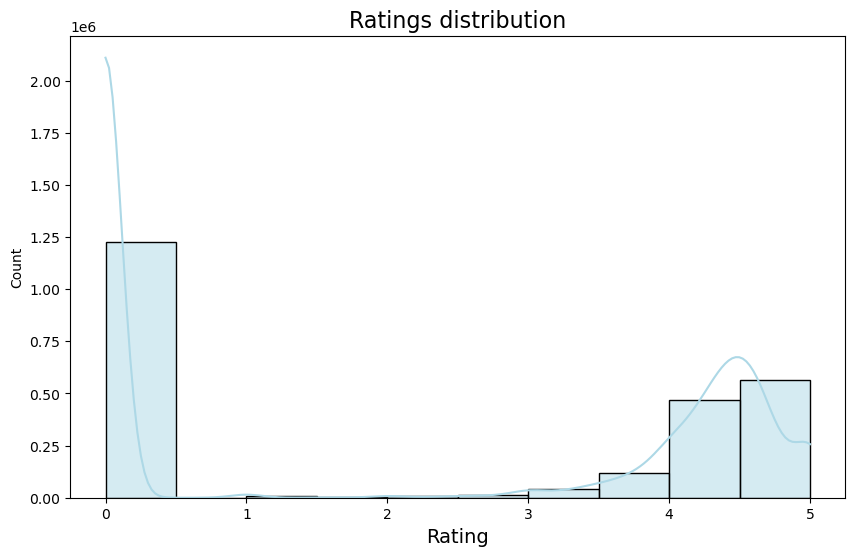

In [49]:
#3.4.1 Visualization for histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_amz['stars'], kde=True, bins=10, color="lightblue", edgecolor='black')
plt.title('Ratings distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)

plt.show()

<Axes: xlabel='stars'>

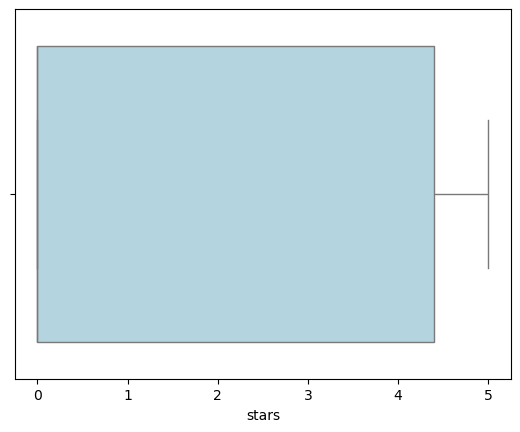

In [50]:
# 2.4.2 Use a box plot to showcase the spread in ratings
# Plotting a boxplot for the 'SalePrice' column with a light blue color
sns.boxplot(x = df_amz['stars'], color="lightblue")